In [2]:
pip install pennylane


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 81.9 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Load the dataset (assuming it's in CSV format)
combined_data_path = '/content/drive/My Drive/raw/combined_climate_water_level_data_cleaned.csv'
df = pd.read_csv(combined_data_path)

# Columns to drop
columns_to_drop = ['timestamp','wind_direction', 'visibility', 'visibility', 'wind_gust_direction', 'solar', 'wind_gust_speed']

# Drop the specified columns
df_cleaned_Data = df.drop(columns=columns_to_drop)
df_cleaned_Data = pd.DataFrame(df_cleaned_Data)

# Replace non-numeric values with NaN and convert the column to numeric
df_cleaned_Data['Waserstand relativ [cm]'] = pd.to_numeric(df_cleaned_Data['Waserstand relativ [cm]'], errors='coerce')

# Drop rows with NaN values
df_cleaned_Data = df_cleaned_Data.dropna(subset=['Waserstand relativ [cm]'])
# Replace non-numeric values with NaN and convert columns to numeric
cols_to_convert = [
    'precipitation', 'pressure_msl', 'temperature', 'wind_speed', 'cloud_cover',
     'dew_point', 'relative_humidity', 'Waserstand relativ [cm]'
]
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df_cleaned_Data = df_cleaned_Data.dropna()


<ipython-input-4-8e2c8c154182>:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(combined_data_path)


In [15]:
from sklearn.model_selection import train_test_split
from pennylane import numpy as np
from sklearn.preprocessing import StandardScaler

# Prepare features and target
# Here we assume that all columns except 'Wasserstand relativ [cm]' are features
X = df_cleaned_Data.drop(columns=['Waserstand relativ [cm]'])
y = df_cleaned_Data['Waserstand relativ [cm]']
#20 % of data

X, y = X[:100], y[:100]
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
# Standardize the features
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

# Standardize the target
scaler_y = StandardScaler()
# y_standardized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Verify the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80, 7)
X_test shape: (20, 7)
y_train shape: (80,)
y_test shape: (20,)


In [ ]:

# y[1]
X

array([[-0.35468114, -1.85143634,  1.56749148,  1.99397193,  0.31097938,
         1.35858151,  0.17384903],
       [-0.35468114, -1.90020326,  1.56749148,  1.50829541,  0.31097938,
         1.29719057, -0.03816198],
       [-0.35468114, -1.88801153,  1.56749148,  1.42734932,  0.31097938,
         1.35858151,  0.17384903],
       [-0.35468114, -1.91239499,  1.56749148,  1.50829541,  0.31097938,
         1.29719057, -0.03816198],
       [ 0.80820784, -1.91239499,  1.34785232,  1.13054701,  0.31097938,
         1.35858151,  0.59787105],
       [ 0.22676335, -1.90020326,  1.20142621,  0.34806817,  0.31097938,
         1.17440869,  0.38586004],
       [ 0.22676335, -1.90020326,  1.20142621,  0.64487049,  0.31097938,
         1.17440869,  0.38586004],
       [ 0.22676335, -1.8392446 ,  1.12821316, -0.02968023,  0.31097938,
         1.11301775,  0.38586004],
       [-0.35468114, -1.80266941,  1.27463927,  0.15919397,  0.31097938,
         0.86745398, -0.462184  ],
       [-0.35468114, -1.7539

In [ ]:
a = []
while True:
    a.append(' ' * 10**6)


KeyboardInterrupt: 

In [6]:
import pennylane as qml
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import multiprocessing as mp
import torch



In [7]:


# #Generate a synthetic regression dataset
# X, y = make_regression(n_samples=100, n_features=7, noise=0.1)
# X = np.array(X)

# y = np.array(y)
# # Convert y to a pandas Series to simulate your situation
# # y = pd.Series(y)

# # Standardize the features
# scaler_X = StandardScaler()
# X = scaler_X.fit_transform(X)

# # Standardize the target
# scaler_y = StandardScaler()
# # y_standardized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()
# y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # Verify the split by printing the first entry of X_train
print("First entry of X_train:", X_train[0])
print("First entry of y_train:", y_train[0])

# Define the quantum device
n_qubits = 7
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def variational_circuit(params, x):
    qml.templates.AngleEmbedding(x, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(params, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(params, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(params, wires=range(n_qubits))
    # qml.templates.StronglyEntanglingLayers(params, wires=range(n_qubits))

    return qml.expval(qml.PauliZ(0))  # Taking the expectation value of the first qubit

# Initialize random parameters
params = np.random.randn(5, n_qubits, 3)
x_sample = X_train[1]  # Use the second sample in X_train for drawing

# Draw the circuit
drawer = qml.draw(variational_circuit)
print(drawer(params, x_sample))

# Define the cost function
def cost(params, X, y):
    predictions = []
    for x in X:
        result = variational_circuit(params, x)
        predictions.append(result)
    predictions = np.array(predictions, dtype=np.float64)  # Ensure predictions is a NumPy array
    print(f"Predictions: {predictions}")  # Debugging line
    if predictions.shape != y.shape:
        print(f"Predictions shape: {predictions.shape}, y shape: {y.shape}")
    return np.mean((predictions - y) ** 2)
# def cost(params, X, y):
#     predictions = np.array([variational_circuit(params, x) for x in X])
#     predictions = predictions[:, 0]  # Taking only the first qubit's expectation value
#     return np.mean((predictions - y) ** 2)

# Optimization loop
opt = qml.GradientDescentOptimizer(stepsize=0.1)
num_epochs = 5

for epoch in range(num_epochs):
    params = opt.step(lambda p: cost(p, X_train, y_train), params)
    train_cost = cost(params, X_train, y_train)
    test_cost = cost(params, X_test, y_test)
    print(f"Epoch {epoch + 1}: Train cost = {train_cost}, Test cost = {test_cost}")


First entry of X_train: [ 0.26423275 -0.934131   -0.64783061  0.7081199   0.45272485 -0.28095359
  1.2163188 ]
First entry of y_train: 2.2755400793555682
0: ─╭AngleEmbedding(M0)─╭StronglyEntanglingLayers(M1)─╭StronglyEntanglingLayers(M1)
1: ─├AngleEmbedding(M0)─├StronglyEntanglingLayers(M1)─├StronglyEntanglingLayers(M1)
2: ─├AngleEmbedding(M0)─├StronglyEntanglingLayers(M1)─├StronglyEntanglingLayers(M1)
3: ─├AngleEmbedding(M0)─├StronglyEntanglingLayers(M1)─├StronglyEntanglingLayers(M1)
4: ─├AngleEmbedding(M0)─├StronglyEntanglingLayers(M1)─├StronglyEntanglingLayers(M1)
5: ─├AngleEmbedding(M0)─├StronglyEntanglingLayers(M1)─├StronglyEntanglingLayers(M1)
6: ─╰AngleEmbedding(M0)─╰StronglyEntanglingLayers(M1)─╰StronglyEntanglingLayers(M1)

──╭StronglyEntanglingLayers(M1)─┤  <Z>
──├StronglyEntanglingLayers(M1)─┤     
──├StronglyEntanglingLayers(M1)─┤     
──├StronglyEntanglingLayers(M1)─┤     
──├StronglyEntanglingLayers(M1)─┤     
──├StronglyEntanglingLayers(M1)─┤     
──╰StronglyEntanglingLa

KeyboardInterrupt: 

Parrallel Processing

In [13]:
# Helper function to run the variational circuit

def run_variational_circuit(params, x):
    return variational_circuit(params, x)

# Define the cost function
def cost(params, X, y):
    predictions = np.array([run_variational_circuit(params, x) for x in X], dtype=np.float64)
    return np.mean((predictions - y) ** 2)

# Parallel cost function
def parallel_cost(params, X, y):
    with mp.Pool(processes=mp.cpu_count()) as pool:
        predictions = np.array(pool.starmap(run_variational_circuit, [(params, x) for x in X]), dtype=np.float64)
    return np.mean((predictions - y) ** 2)

# Define the optimization step function at top level
def optimization_step(opt, params, X_train, y_train):
    return opt.step(lambda p: parallel_cost(p, X_train, y_train), params)

# Optimization loop
opt = qml.GradientDescentOptimizer(stepsize=0.1)
num_epochs = 5

for epoch in range(num_epochs):
    params = optimization_step(opt, params, X_train, y_train)
    train_cost = parallel_cost(params, X_train, y_train)
    test_cost = parallel_cost(params, X_test, y_test)
    print(f"Epoch {epoch + 1}: Train cost = {train_cost}, Test cost = {test_cost}")


AttributeError: Can't pickle local object 'VJPNode.initialize_root.<locals>.<lambda>'

In [16]:
# Define the quantum device
n_qubits = 7
dev = qml.device("default.qubit", wires=n_qubits)
@qml.qnode(dev)
def variational_circuit(params, x):
    qml.templates.AngleEmbedding(x, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(params, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(params, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(params, wires=range(n_qubits))
    # qml.templates.StronglyEntanglingLayers(params, wires=range(n_qubits))

    return qml.expval(qml.PauliZ(0))  # Taking the expectation value of the first qubit

# Normalize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Initialize random parameters
params = torch.randn((5, n_qubits, 3), requires_grad=True)

# Define the cost function
def cost(params, X, y):
    predictions = torch.stack([variational_circuit(params, x) for x in X])
    return torch.mean((predictions - y) ** 2)

# Optimization loop
opt = torch.optim.Adam([params], lr=0.1)
num_epochs = 5

for epoch in range(num_epochs):
    opt.zero_grad()
    train_cost = cost(params, X_train, y_train)
    train_cost.backward()
    opt.step()
    test_cost = cost(params, X_test, y_test)
    print(f"Epoch {epoch + 1}: Train cost = {train_cost.item()}, Test cost = {test_cost.item()}")

Epoch 1: Train cost = 1.0538344613401944, Test cost = 0.7724203032898519
Epoch 2: Train cost = 0.888259098210878, Test cost = 0.653633919745377
Epoch 3: Train cost = 0.7599654878146757, Test cost = 0.5998823301903562
Epoch 4: Train cost = 0.7031713479613724, Test cost = 0.5729601059519978
Epoch 5: Train cost = 0.6740247204426439, Test cost = 0.5279062434164103


Train MSE: 0.63, Train R-squared: 0.39
Test MSE: 0.53, Test R-squared: 0.38


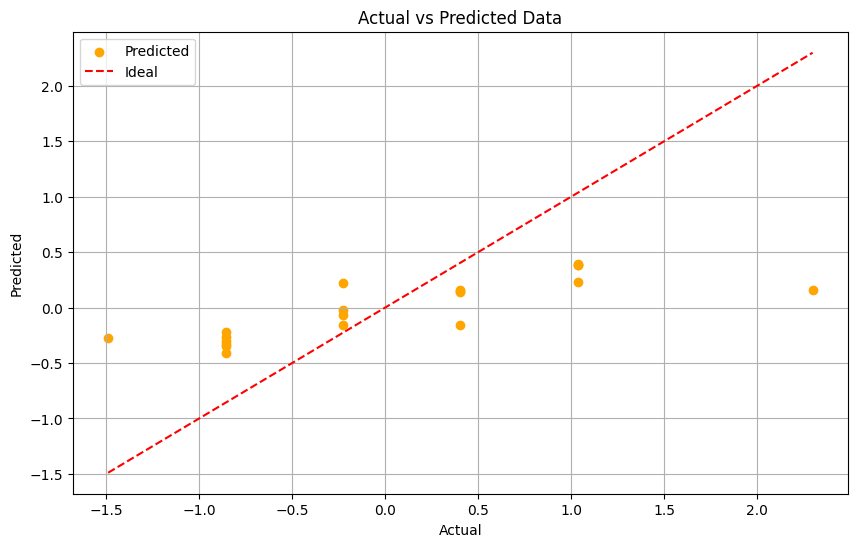

In [23]:
 #Final evaluation and plotting
y_pred_train = torch.stack([variational_circuit(params, x) for x in X_train]).detach().numpy()
y_pred_test = torch.stack([variational_circuit(params, x) for x in X_test]).detach().numpy()
# y_pred_train = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1)).flatten()
# y_pred_test = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()
# # Calculate metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse:.2f}, Train R-squared: {train_r2:.2f}")
print(f"Test MSE: {test_mse:.2f}, Test R-squared: {test_r2:.2f}")

# Plot the actual vs predicted data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='orange', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Data')
plt.legend()
plt.grid(True)
plt.show()

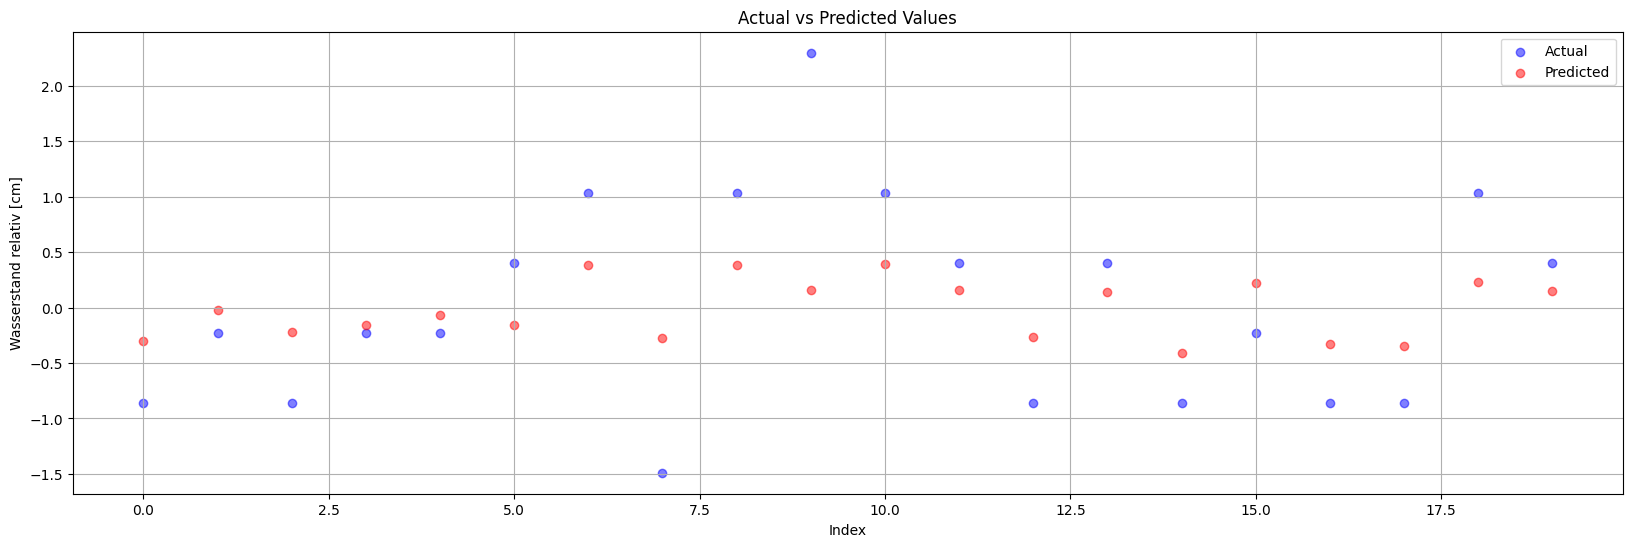

In [26]:
# Plotting the actual vs predicted values with different colors
plt.figure(figsize=(20, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(range(len(y_pred_test)), y_pred_test, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Wasserstand relativ [cm]')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Predict and inverse transform the predictions
# y_pred = np.array([variational_circuit(params, x) for x in X_test], dtype=np.float64)
# print(f"y_pred: {y_pred}")  # Debugging line

y_pred_original_scale = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original_scale = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
r2 = r2_score(y_test_original_scale, y_pred_original_scale)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original_scale, y_pred_original_scale, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test_original_scale), max(y_test_original_scale)], [min(y_test_original_scale), max(y_test_original_scale)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Predicted vs Actual Data')
plt.legend()
plt.show()

NameError: name 'y_pred' is not defined

In [25]:
# Plotting the actual vs predicted values with different colors
plt.figure(figsize=(20, 6))
plt.scatter(range(len(y_test_original_scale)), y_test_original_scale, color='blue', alpha=0.5, label='Actual')
plt.scatter(range(len(y_pred_original_scale)), y_pred_original_scale, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Wasserstand relativ [cm]')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'y_test_original_scale' is not defined

<Figure size 2000x600 with 0 Axes>

In [ ]:
y_test_original_scale - y_pred_original_scale

array([-1.43418852, -0.39107656, -1.36382127, -0.47794404, -0.58931336,
        0.37336016,  1.54954347, -2.3562551 ,  1.61586678,  3.60051027,
        1.61141437,  0.56005775, -1.39167174,  0.50815985, -1.31484881,
       -0.34501113, -1.63529976, -1.62138329,  1.60695458,  0.48984242])